# **Time Series forecasting for Amazon stock price**

# Introduction
This project aims to perform time series forecasting on Amazon stock prices using historical data from 1997 to 2020. The goal is to develop an accurate model to predict future stock prices, leveraging the SARIMA (Seasonal AutoRegressive Integrated Moving Average) model. The process involves loading the dataset, conducting exploratory data analysis (EDA) to understand its structure and characteristics, preprocessing the data for modeling and finally building and evaluating the forecasting model. The focus is primarily on the 'Close' price of the stock, as it is a widely used indicator in financial analysis and provides a reliable measure of the stock's value at the end of each trading day.

# Description of Data
Here's a brief description of each column:

1. Date: The date of the recorded financial data.
2. High: The highest price of the financial asset during the given date.
3. Low: The lowest price of the financial asset during the given date.
4. Open: The opening price of the financial asset at the beginning of the given date.
5. Close: The closing price of the financial asset at the end of the given date.
6. Volume: The trading volume or the number of shares/contracts traded during the given date.
7. Adj Close: The adjusted closing price of the financial asset at the end of the given date.

**Importing all the necessary libraries**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

**Loading the Dataset**

In [47]:
df=pd.read_csv('/content/archive (5).zip')

**Exploratory Data Analysis**

In [3]:
# To print the top 5 rows of the data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [4]:
# To print the last five rows of the data
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5837,2020-07-27,3062.00000,3098.000000,3015.77002,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.27002,3077.090088,2995.76001,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.98999,3039.159912,2996.77002,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.00000,3092.000000,3005.00000,3051.879883,3051.879883,6128300
5841,2020-07-31,3244.00000,3246.820068,3151.00000,3164.679932,3164.679932,8085500


In [48]:
df.shape

(5842, 7)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5842 non-null   object 
 1   Open       5842 non-null   float64
 2   High       5842 non-null   float64
 3   Low        5842 non-null   float64
 4   Close      5842 non-null   float64
 5   Adj Close  5842 non-null   float64
 6   Volume     5842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 319.6+ KB


In [50]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5842.000000,5842.000000,5842.000000,5842.000000,5842.000000,5.842000e+03
mean,372.707174,376.921392,368.114569,372.746660,372.746660,7.519048e+06
std,585.571802,591.766458,578.660700,585.607655,585.607655,7.282683e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.955001,38.547501,37.207500,37.927499,37.927499,3.684900e+06
50%,83.428749,84.945000,81.656250,83.459999,83.459999,5.657200e+06
75%,359.729988,363.439987,356.280006,360.047501,360.047501,8.533400e+06
max,3251.060059,3344.290039,3151.000000,3200.000000,3200.000000,1.043292e+08


In [51]:
# Checking if there are any null values in the data.
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
df1 = df.copy()

In [21]:
df1 = df1[['Date','Close']]
df1.head()

,Date,Close
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083


In [28]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.head()

,Date,Close
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5842 non-null   datetime64[ns]
 1   Close   5842 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 91.4 KB


In [53]:
df1.columns

Index(['Date', 'Close'], dtype='object')

In [54]:
df1.describe()

,Date,Close
count,5842,5842.000000
mean,2008-12-22 20:41:34.488188928,372.746660
min,1997-05-15 00:00:00,1.395833
25%,2003-03-07 18:00:00,37.927499
50%,2008-12-22 12:00:00,83.459999
75%,2014-10-12 06:00:00,360.047501
max,2020-07-31 00:00:00,3200.000000
std,NaN,585.607655


In [57]:
print(df.columns)
df.head()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


Visualize the Time Series Data

In [58]:
import plotly.express as px
fig = px.line(df, x='Date', y='Close')
fig.show()

In [59]:
fig = px.line(df, x='Date', y=df.columns,title = 'stock price')# plot the data using plotly
fig.show()

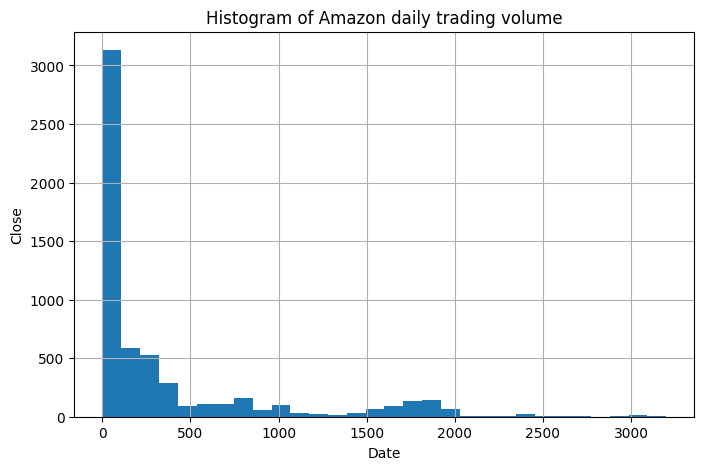

In [62]:
#Histogram of Amazon daily trading volume
plt.figure(figsize=(8,5))
plt.hist(df['Close'], bins = 30)
plt.title('Histogram of Amazon daily trading volume')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()

#Testing For Stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(df):
    result=adfuller(df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adfuller_test(df['Close'])


ADF Test Statistic : 5.618546547149937
p-value : 1.0
#Lags Used : 34
Number of Observations Used : 5807
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


From the above we know that our dataset is not stationary. so we use differencing to covert into stationary

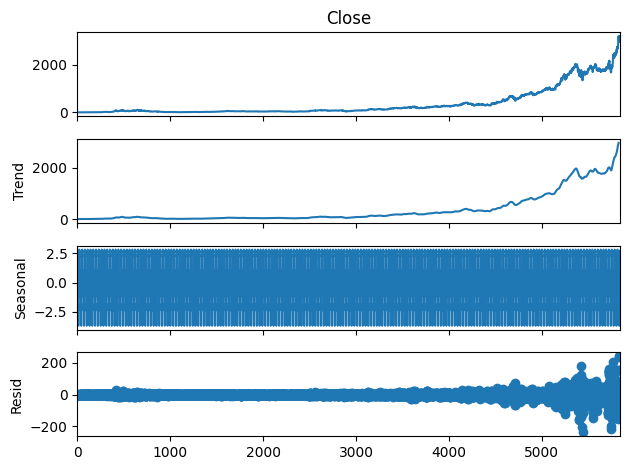

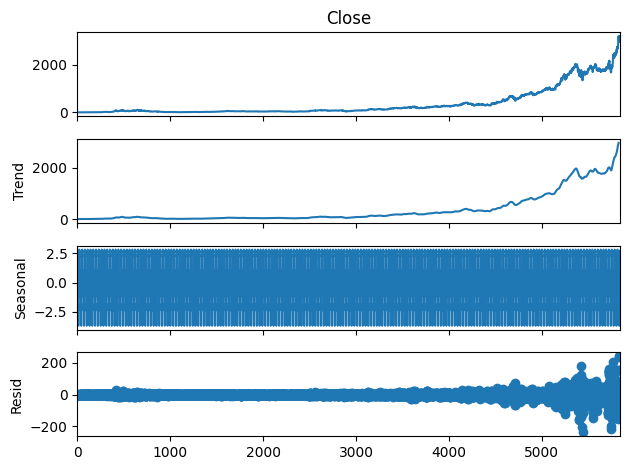

In [63]:
#decompose the data to see the trend seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Close'],model='addictive',period=30)
result.plot()


The Time series decomposition reveals that the observed data is characterised by a strong upward trend and a consistent seasonal pattern. The residual component shows random variation around zero, suggesting that the model has effectively captured the main trend and seasonal elements of the time series, helping to understand the underlying factors in the data and making more accurate predictions.

**Auto regressive model**

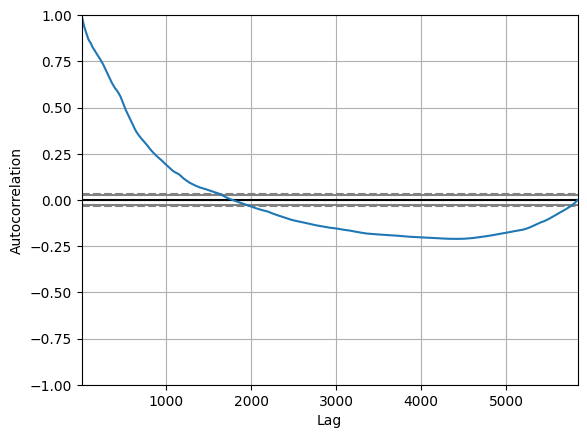

In [66]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

The Auto regressive plot indicates a strong autocorrelation in the time series, with significant positive autocorrelation at lower lags. diminishing gradually as lags increases. The presence of negative correlations at intermediate lags suggests periodicity or cyclic patterns in the data.

# Differencing

0         NaN
1   -0.229167
2   -0.020833
3   -0.072917
4   -0.208333
Name: Close First Difference, dtype: float64

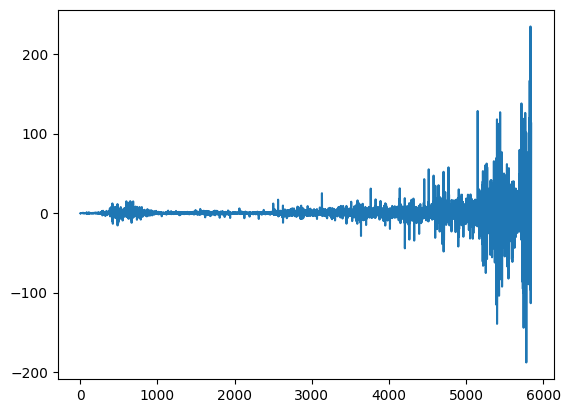

In [69]:
df['Close First Difference']= df['Close']-df['Close'].shift(1) #first order differencing
df['Close First Difference'].plot()
df['Close First Difference'].head()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12   -0.479167
13   -0.312500
14   -0.166667
Name: Seasonal First Difference, dtype: float64

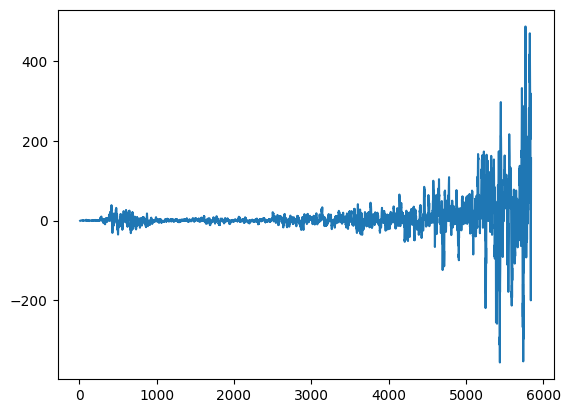

In [71]:
df['Seasonal First Difference']= df['Close']-df['Close'].shift(12) #first order differencing
df['Seasonal First Difference'].plot()
df['Seasonal First Difference'].head(15)

In [72]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.115811541274674
p-value : 9.731485821245273e-18
#Lags Used : 29
Number of Observations Used : 5800
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Now our data is stationary

# **Auto correlation and partial auto correlation**

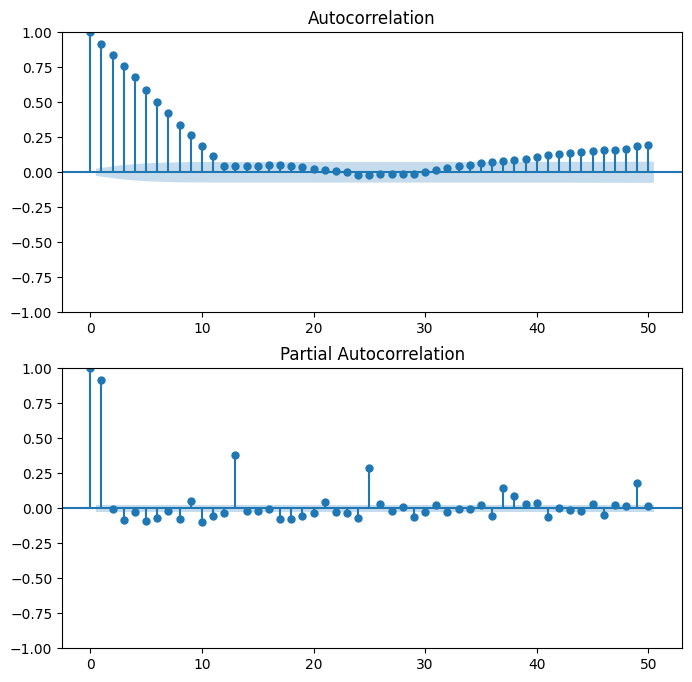

In [83]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=50,ax=ax2)

*ACF :* The ACF graph indicates the presence of significant autocorrelation at lower lags, suggesting that recent past values have a strong influence on future values. The gradual decay and eventual crossing of zero indicate that this influence diminishes over time.

*PACF :* The PACF graph is useful for identifying the appropriate lag order for the autoregressive (AR) part of the SARIMA model. Significant spikes at the initial lags, followed by values near zero, suggest that the series can be adequately modeled with a few autoregressive terms. The sharp drop-off after the initial lags indicates that including higher-order lags would not significantly improve the model. This helps in determining the AR component (p) in SARIMA modeling.

**As we are taking seasonal differences to converting into stationary, ARIMA model is not suitable for this time series analysis. So we are applying SARIMA model.**

# **SARIMA Model**

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p,d,q=4,1,4
model=SARIMAX(df['Close'],order=(p,d,q),seasonal_order=(p,d,q,12))
model=model.fit()
model.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 5842
Model:             SARIMAX(4, 1, 4)x(4, 1, 4, 12)   Log Likelihood              -23651.317
Date:                            Wed, 03 Jul 2024   AIC                          47336.634
Time:                                    10:09:05   BIC                          47450.034
Sample:                                         0   HQIC                         47376.072
                                           - 5842                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0490      0.063     -0.774      0.439      -0.173       0.075
ar.L2          0.3717      0.058      6.439      0.000       0.259       0.485
ar.L3          0.1088      0.060      1.820      0.069      -0.008       0.226
ar.L4         -0.5824      0.049    -11.781      0.000      -0.679      -0.485
ma.L1         -0.0065      0.062     -0.104      0.917      -0.128       0.115
ma.L2         -0.3361      0.054     -6.195      0.000      -0.442      -0.230
ma.L3         -0.1343      0.056     -2.394      0.017      -0.244      -0.024
ma.L4          0.6155      0.046     13.306      0.000       0.525       0.706
ar.S.L12      -2.1549      0.074    -29.296      0.000      -2.299      -2.011
ar.S.L24      -1.9524      0.092    -21.277      0.000      -2.132      -1.773
ar.S.L36      -0.6545      0.057    -11.579      0.000      -0.765      -0.544
ar.S.L48       0.0602      0.010      6.037      0.000       0.041       0.080
ma.S.L12       1.2269      0.084     14.607      0.000       1.062       1.392
ma.S.L24      -0.1368      0.118     -1.157      0.247      -0.369       0.095
ma.S.L36      -1.2941      0.120    -10.796      0.000      -1.529      -1.059
ma.S.L48      -0.7956      0.080     -9.976      0.000      -0.952      -0.639
sigma2       195.1292     10.018     19.477      0.000     175.494     214.765
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            516866.43
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             119.88   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

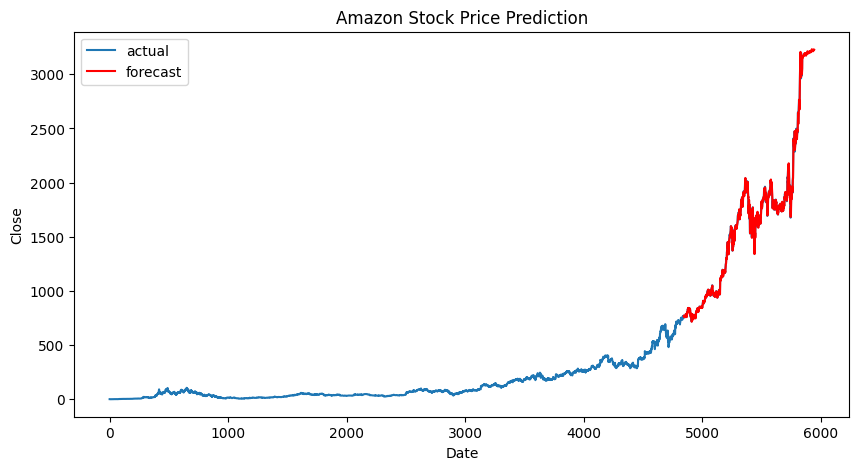

In [23]:
predictions=model.predict(start=len(df["Close"])-1000,end=len(df["Close"])+100)

# plot the prediction
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='actual')
plt.plot(predictions,color="red",label='forecast')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Amazon Stock Price Prediction')
plt.legend()
plt.show()

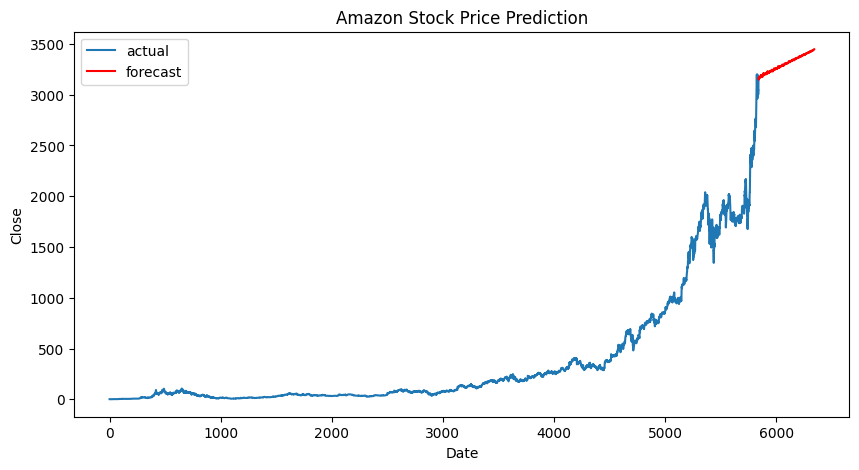

In [24]:
predictions=model.predict(start=len(df["Close"]),end=len(df["Close"])+500)

# plot the prediction
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='actual')
plt.plot(predictions,color="red",label='forecast')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Amazon Stock Price Prediction')
plt.legend()
plt.show()

In [29]:
df2 = df1.copy()
df2.head()

,Date,Close
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083


In [36]:
df2.set_index('Date',inplace=True)

In [37]:
df2.columns

Index(['Close'], dtype='object')

In [39]:
from pandas.tseries.offsets import DateOffset
#df.set_index('Date',inplace=True)
future_dates=[df2.index[-1]+ DateOffset(days=x) for x in range(0,500)]#setting index for date

In [40]:
future_dataset_df2 =pd.DataFrame(index=future_dates[1:],columns=df2.columns)#Creating new dataframe to the future dataset

In [41]:
future_df2=pd.concat([df2,future_dataset_df2])#concatenating the future dataset to the present dataset

In [42]:
future_df2['forecast'] = model.predict(start = 2000, end = 4000, dynamic= True)#forecasting the data with already existing data

In [43]:
future_dataset_df2.tail()

,Close
2021-12-08,NaN
2021-12-09,NaN
2021-12-10,NaN
2021-12-11,NaN
2021-12-12,NaN


# **Conclusion**

Based on the provided graph of Amazon stock price prediction

*   The graph shows both the actual stock prices (in blue) and the forecasted stock prices (in red) for Amazon.

*   The actual stock prices exhibit an overall upward trend, indicating that Amazon stock price has been increasing over the observed period.

*   Towards the end of the actual data, there is a sharp increase in stock price, which is captured and extended by the forecast.
*   The forecast (red line) continues the upward trend, suggesting confidence in the continued increase of Amazon stock price, although it should be interpreted contiously due to inherent uncertainties in stock price predictions.

*   To improve the accuracy of future forecasts, consider experimenting with more advanced models such as Long Short-Term Memory (LSTM) networks, or Prophet. Additionally, perform further hyperparameter tuning and include more recent data to better capture the current market trends.